In [1]:
import numpy as np 
import pandas as pd

# Bar plots

## simple barplot

In [2]:

df = pd.DataFrame({"heights":[2,3,4,5,1,3], 
                   "heights2":[3,4,5,6,3,2],
                   "errors":[0.2,0.3,0.05,0.1,0.3,0.2],
                    "errors2":[0.5,0.5,0.5,0.5,0.5,0.8]})

In [3]:
df

,heights,heights2,errors,errors2
0,2,3,0.20,0.5
1,3,4,0.30,0.5
2,4,5,0.05,0.5
3,5,6,0.10,0.5
4,1,3,0.30,0.5
5,3,2,0.20,0.8


We can use `df.plot(kind="bar")` to do a barplot

<AxesSubplot:>

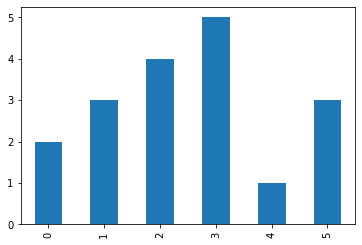

In [4]:
df["heights"].plot(kind="bar")

Colors can be specified in a list

<AxesSubplot:>

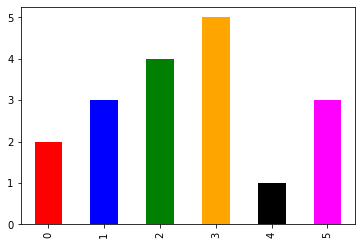

In [5]:
df["heights"].plot(kind="bar",color=["red","blue", "green","orange","black","magenta"])

By default it will create a group for each of the columns in the dataframe.

<AxesSubplot:>

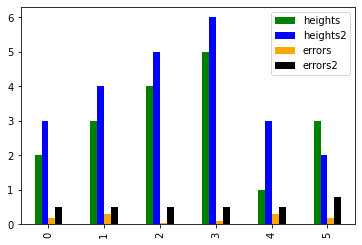

In [6]:
df.plot(kind="bar", color=["g","b","orange","black"])

You can use paletters of colors from seaborn

In [7]:
import seaborn as sns
sns.cubehelix_palette(4)

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.7840440880599453, 0.5292660544265891, 0.6200568926941761],
 [0.5151069036855755, 0.29801047535056074, 0.49050619139300705],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [8]:
sns.light_palette("green")

[(0.9197652656492237, 0.9527224554855785, 0.9196755184291893),
 (0.7358122125193789, 0.8625701212512079, 0.7357404147433514),
 (0.5518591593895341, 0.7724177870168373, 0.5518053110575135),
 (0.36790610625968945, 0.6822654527824668, 0.36787020737167575),
 (0.18395305312984467, 0.5921131185480961, 0.18393510368583776),
 (0.0, 0.5019607843137255, 0.0)]

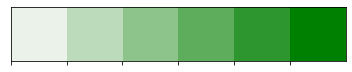

In [9]:
sns.palplot(sns.light_palette("green"))


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:219: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


<AxesSubplot:>

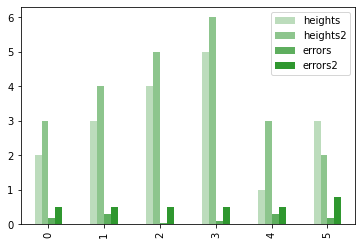

In [10]:
df.plot(kind="bar", 
        color=sns.light_palette("green")[1:5], 
        colormap='Paired')

<AxesSubplot:>

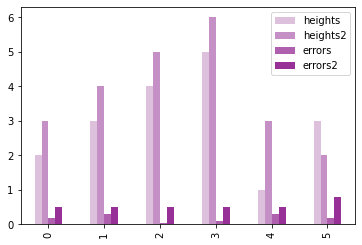

In [11]:
df.plot(kind="bar", 
        color=sns.light_palette("purple", reverse=False)[1:5], 
        colormap='Paired')

In this case though maybe we wanted to use the `"errors"` column to display error bars.

We can do this passing `yerr`



<AxesSubplot:>

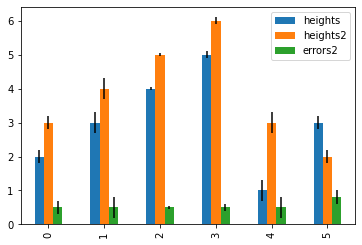

In [12]:
df.plot(kind="bar",yerr="errors")

In [13]:
df_errors = df[["errors", "errors2"]]

In [14]:
#df.plot(kind="bar",yerr=df[["errors", "errors2"]].values.flatten())

In [15]:
df[["errors", "errors2"]].values.flatten()

array([0.2 , 0.5 , 0.3 , 0.5 , 0.05, 0.5 , 0.1 , 0.5 , 0.3 , 0.5 , 0.2 ,
       0.8 ])

In [16]:
df

,heights,heights2,errors,errors2
0,2,3,0.20,0.5
1,3,4,0.30,0.5
2,4,5,0.05,0.5
3,5,6,0.10,0.5
4,1,3,0.30,0.5
5,3,2,0.20,0.8


<AxesSubplot:>

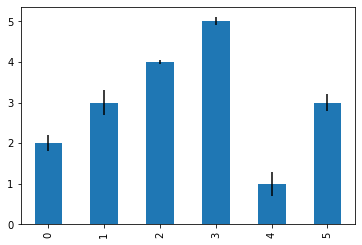

In [17]:
df["heights"].plot(kind="bar",yerr=df["errors"])

## Multi-index barplot

In [18]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], 
                                 names=['letter', 'word'])


In [19]:
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 
                    'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, 
                    index=ix3)


In [20]:
df3

data1  data2
letter word              
a      foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       3      6
       bar       2      5

In [21]:
gp3 = df3.groupby(level=('letter', 'word'))

In [22]:
gp3

In [23]:
means = gp3.mean()

In [24]:
errors = gp3.std()

In [25]:
means

data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5

In [26]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

<AxesSubplot:xlabel='letter,word'>

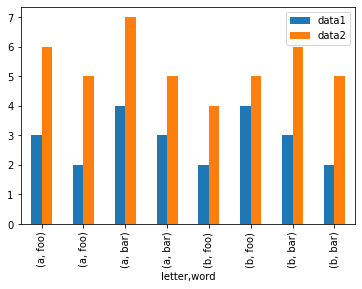

In [27]:
df3.plot(kind="bar")

In [28]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

In [29]:
df3

data1  data2
letter word              
a      foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       3      6
       bar       2      5

<AxesSubplot:xlabel='letter,word'>

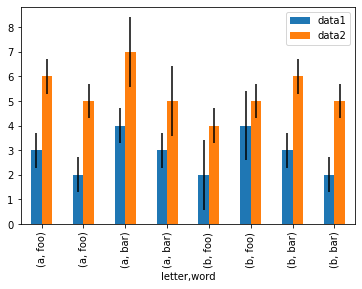

In [30]:
df3.plot(kind="bar", yerr=errors)

## Boxplots

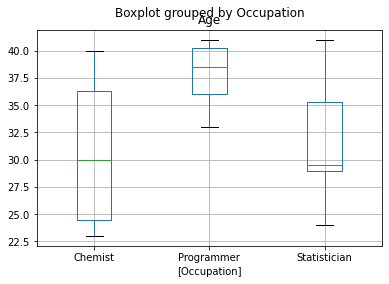

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
 
employees = pd.DataFrame({
    'Occupation': ['Chemist', 'Statistician', 'Statistician', 'Statistician',
                   'Programmer', 'Chemist', 'Statistician', 'Statistician',
                   'Statistician', 'Programmer', 'Chemist', 'Statistician',
                   'Statistician', 'Statistician', 'Programmer', 'Chemist',
                   'Statistician', 'Statistician', 'Statistician', 'Programmer'
                   ],
    'Age': [23, 24, 34, 29, 40, 25, 26, 29, 40, 41, 40, 35, 41, 29, 33, 35,
            29, 30, 36, 37],
    'Salary': [40, 24, 44, 99, 70, 75, 86, 89, 60, 50, 60, 65, 70, 50, 50, 55,
            50, 60, 56, 77]})
 
employees.boxplot(column=['Age'], by=['Occupation'])
 
plt.show()

In [32]:
employees.head()

,Occupation,Age,Salary
0,Chemist,23,40
1,Statistician,24,24
2,Statistician,34,44
3,Statistician,29,99
4,Programmer,40,70


<AxesSubplot:>

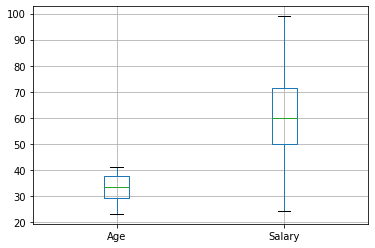

In [33]:
employees.boxplot(column=["Age","Salary"])

<AxesSubplot:xlabel='Occupation', ylabel='value'>

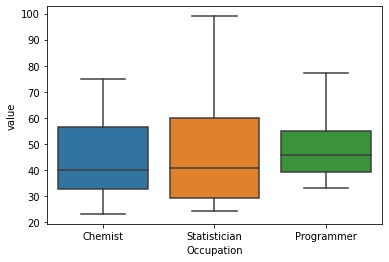

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_employees = pd.melt(employees,
                       id_vars=['Occupation'],
                       value_vars=['Age','Salary'])

sns.boxplot(x='Occupation',y='value',data=df_employees)

<AxesSubplot:>

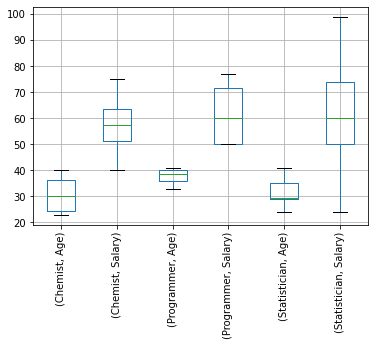

In [35]:
employees_g = employees.groupby("Occupation")    

employees_g.boxplot(subplots=False, rot = 90,sharex=True)

If the y axis is shared for all the columns it would make sense to join the differnet values
we are comparing.

Imagine we want to make a boxplot such that

- X axis values represent different variables we want to summarize as a boxplot.
- Each value in the X axis will plot several boxplots, as many as values in a `hue` column.

To make such a plot we need to:

- Create a new dataframe containing a new column `Group` that will conver every example from the original dataframe to several examples of the new dataframe. 

In [136]:
employees.head()

,Occupation,Age,Salary
0,Chemist,23,40
1,Statistician,24,24
2,Statistician,34,44
3,Statistician,29,99
4,Programmer,40,70


In [132]:
import seaborn as sns

df_employees_melt = pd.melt(employees,
                            id_vars=['Occupation'],
                            value_vars=['Age','Salary'],
                            var_name='Group')

df_employees_melt.head()

,Occupation,Group,value
0,Chemist,Age,23
1,Statistician,Age,24
2,Statistician,Age,34
3,Statistician,Age,29
4,Programmer,Age,40


Note that `df_employees_melt` has twice the number of examples as `employees`.

This number equals len(value_vars) times the number of original examples in the dataframe.


The information in `employees.loc[[0]]` is written as two rows of `df_employees_melt`.

Note that `employees.loc[[0]]`  is `df_employees_melt[[0,21]]`

In [151]:
employees.loc[[0]]

,Occupation,Age,Salary
0,Chemist,23,40


In [153]:
df_employees_melt.loc[[0,21]]

,Occupation,Group,value
0,Chemist,Age,23
21,Statistician,Salary,24


Now the plot can be done with `sns.boxplot`

<AxesSubplot:xlabel='Group', ylabel='value'>

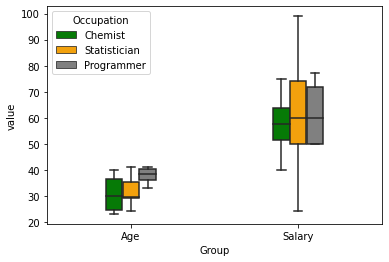

In [154]:

sns.boxplot(x='Group',   # Variable containing G1, G2,... 
            y='value',   # Values to be summarized in the boxplot
            data=df_employees_melt, 
            hue='Occupation', # Variable containing the subgroups we want to compare 
            width = 0.3,
            hue_order=["Chemist","Statistician", "Programmer"],
            palette=["green","orange","gray"],
            saturation=0.9)
            

### Boxplot example grouped by group values

In [39]:
df = pd.DataFrame({'Group':['A','A','A','B','C','B','B','C','A','C'],\
                  'Apple':np.random.rand(10),'Orange':np.random.rand(10)})
df = df[['Group','Apple','Orange']]
df

,Group,Apple,Orange
0,A,0.662617,0.978173
1,A,0.213982,0.707922
2,A,0.072677,0.819361
3,B,0.384316,0.897411
4,C,0.933129,0.246850
5,B,0.386568,0.164950
6,B,0.319751,0.540070
7,C,0.238267,0.395432
8,A,0.272255,0.710201
9,C,0.041085,0.944538


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_melt = pd.melt(df,id_vars=['Group'],value_vars=['Apple','Orange'],var_name='fruits')
df_melt

,Group,fruits,value
0,A,Apple,0.662617
1,A,Apple,0.213982
2,A,Apple,0.072677
3,B,Apple,0.384316
4,C,Apple,0.933129
5,B,Apple,0.386568
6,B,Apple,0.319751
7,C,Apple,0.238267
8,A,Apple,0.272255
9,C,Apple,0.041085


<AxesSubplot:xlabel='Group', ylabel='value'>

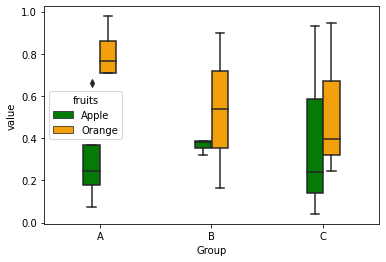

In [41]:

sns.boxplot(x='Group',
            y='value',
            data=df_melt, 
            hue='fruits',
            width = 0.3,
            hue_order=["Apple","Orange"],
            palette=["green","orange"],
            saturation=0.9)
            